In [1]:
import warnings
warnings.filterwarnings('ignore')

# Ödev 2
https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/odev2veri.csv adresinden okuyacağınız veri setini kullanarak aşağıdaki sınıflandırma (classification) işlemlerini yapınız.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/yasarkucukefe/YBS_405/main/data/odev2veri.csv')

In [4]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# Soru 1
Veri setindeki değişkenleri "standardize" ediniz. (ipucu: StandardScaler().fit_transform())

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
df = pd.DataFrame(StandardScaler().fit_transform(df),columns=df.columns)

In [7]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627,-1.0
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546,1.0
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811,1.0
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793,-1.0
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762,-1.0


# Soru 2
Veri setindeki "TARGET CLASS" kolonu y, diğer kolonları X data frame'leri olarak ayırınız.

In [8]:
y = df['TARGET CLASS']
x = df.drop('TARGET CLASS', axis=1)

In [9]:
y

0     -1.0
1      1.0
2      1.0
3     -1.0
4     -1.0
      ... 
995   -1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: TARGET CLASS, Length: 1000, dtype: float64

In [10]:
x

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762
...,...,...,...,...,...,...,...,...,...,...
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456


# Soru 3
Veri setinin %70'ini eğitim (training), %30'unu test verisi olarak ayırınız. (ipucu: train_test_split ile bir veri setini eğitim ve test olarak ayırabilirsiniz. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [12]:
[train, test] = train_test_split(df, train_size = 0.7, test_size = 0.3, shuffle = False)

In [14]:
# Eğitim
train_y = train['TARGET CLASS']
train_x = train.drop('TARGET CLASS', axis=1)

# Test
test_y = test['TARGET CLASS']
test_x = test.drop('TARGET CLASS', axis=1)

# Soru 4
Komşu sayısı 4 olan bir KNN sınıflandırma modeli oluşturunuz ve modelin doğruluk oranını hesaplayınız. (ipucu: KNeighborsClassifier())

In [15]:
nb = KNeighborsClassifier(n_neighbors=4).fit(train_x, train_y)

print("Eğitim verisi doğruluk oranı: "+str("{:.2%}".format(nb.score(train_x, train_y))))

Eğitim verisi doğruluk oranı: 87.14%


# Soru 5
GridSearchCV kullarak model için en uygun komşu sayısını hesaplayınız. (n_neighbors parametresinin 2 ve 40 arasındaki değerleri için)

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
knn = KNeighborsClassifier()

grid = GridSearchCV(knn, {'n_neighbors': range(2, 40)})

best_knn = grid.fit(train_x, train_y).best_estimator_

best_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 39,
 'p': 2,
 'weights': 'uniform'}

# Soru 6
Bulduğunuz en uygun komşu sayısı için modelin sağladığı doğruluk oranını eğitim ve test veri setleri için ayrı ayrı hesaplayınız.

In [18]:
print("Eğitim verisi doğruluk oranı: "+str("{:.2%}".format(best_knn.score(train_x, train_y))))

print("Test verisi doğruluk oranı: "+str("{:.2%}".format(best_knn.score(test_x, test_y))))

Eğitim verisi doğruluk oranı: 85.14%
Test verisi doğruluk oranı: 79.33%


# Soru 7
Bulduğunuz en uygun komşu sayısı için modelin performansını değerlendirmek amacıyla hata metrisini (confusion matrix) eğitim ve test veri setlerini kullanarak ayrı ayrı hesaplayınız.

In [19]:
from sklearn.metrics import plot_confusion_matrix

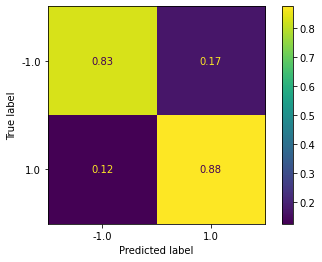

In [20]:
plot_confusion_matrix(best_knn, train_x, train_y, normalize='true')

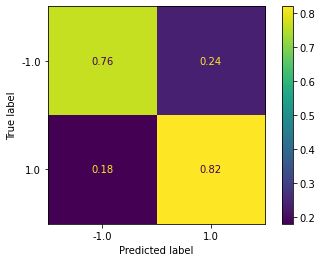

In [21]:
plot_confusion_matrix(best_knn, test_x, test_y, normalize='true')